# NextEra Energy Inc. Stocks

### In this class, we will analyze the NextEra stock and make predictions about its future performance

<a href='https://www.kaggle.com/datasets/middlehigh/nextera-energy-inc-stocks/data' target=_blank>You can find the data file here</a>

<img src=https://upload.wikimedia.org/wikipedia/de/thumb/e/ef/NextEra_Energy_Logo.svg/1200px-NextEra_Energy_Logo.svg.png width='600'>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('NEE.csv')

In [3]:
df.head()

Date      Open      High       Low     Close  Adj Close   Volume
0  2000-01-03  5.296875  5.296875  5.132813  5.156250   2.374470  4096800
1  2000-01-04  5.125000  5.265625  5.125000  5.250000   2.417643  5487200
2  2000-01-05  5.203125  5.531250  5.203125  5.421875   2.496793  5488800
3  2000-01-06  5.429688  5.476563  5.375000  5.421875   2.496793  2960000
4  2000-01-07  5.453125  5.601563  5.406250  5.578125   2.568744  7999200

In [4]:
df.tail()

Date       Open       High        Low      Close  Adj Close  \
6115  2024-04-24  65.910004  67.099998  65.220001  66.559998  66.559998   
6116  2024-04-25  66.000000  67.120003  65.510002  66.900002  66.900002   
6117  2024-04-26  67.220001  67.300003  65.750000  65.989998  65.989998   
6118  2024-04-29  67.019997  67.910004  66.959999  67.419998  67.419998   
6119  2024-04-30  66.900002  67.489998  66.269997  66.970001  66.970001   

        Volume  
6115  12149600  
6116  11418500  
6117   9982800  
6118   9795800  
6119  10042000

In [5]:
df.shape

(6120, 7)

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6120 non-null   object 
 1   Open       6120 non-null   float64
 2   High       6120 non-null   float64
 3   Low        6120 non-null   float64
 4   Close      6120 non-null   float64
 5   Adj Close  6120 non-null   float64
 6   Volume     6120 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 334.8+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [9]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month

In [10]:
px.line(df,x='Date',y='Close',template = 'plotly_dark')

In [1]:
# The resulting graphic does not appear on github

<Axes: xlabel='month', ylabel='Close'>

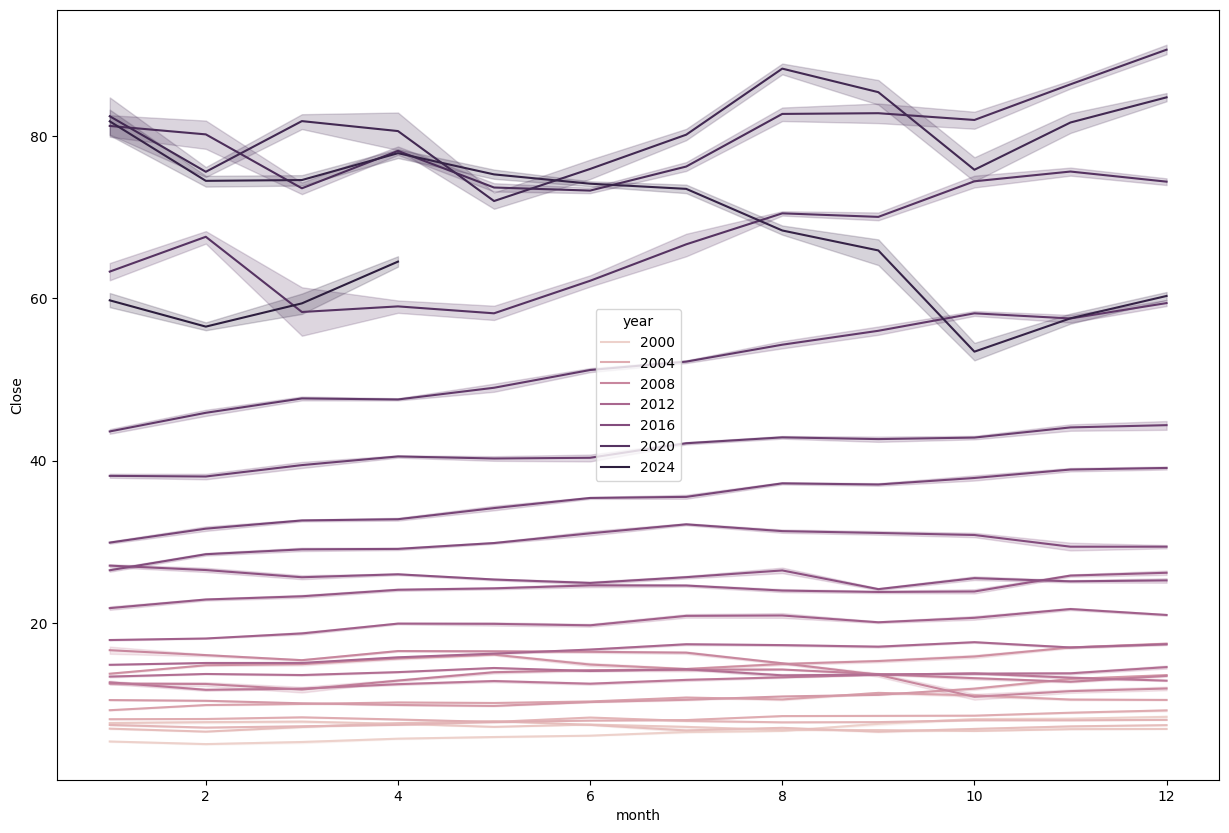

In [11]:
plt.figure(figsize=(15,10))
sns.lineplot(df,x='month',y='Close',hue='year')

In [12]:
forecast_data=df.rename(columns={'Date':'ds','Close':'y'}) 

In [13]:
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecast=model.make_future_dataframe(periods=365) #365 days
predictions=model.predict(forecast)
plot_plotly(model,predictions)

13:18:48 - cmdstanpy - INFO - Chain [1] start processing
13:18:49 - cmdstanpy - INFO - Chain [1] done processing


### We predict that the score range for the upcoming year will be between 77,000 and 80,000.